# Data exploration and visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.shape

(891, 12)

In [5]:
%matplotlib inline
import seaborn
seaborn.set()

## survived / died by class

In [6]:
survived_class = dataset[dataset['Survived']==1]['Pclass'].value_counts()

In [7]:
print(survived_class)

1    136
3    119
2     87
Name: Pclass, dtype: int64


In [8]:
dead_class = dataset[dataset['Survived']==0]

In [9]:
dead_class = dead_class['Pclass'].value_counts()

In [10]:
print(dead_class)

3    372
2     97
1     80
Name: Pclass, dtype: int64


In [11]:
df_class = pd.DataFrame([survived_class,dead_class])

In [12]:
print(df_class)

          1   2    3
Pclass  136  87  119
Pclass   80  97  372


In [13]:
df_class.index = ['Survived','Died']

In [14]:
print(df_class)

            1   2    3
Survived  136  87  119
Died       80  97  372


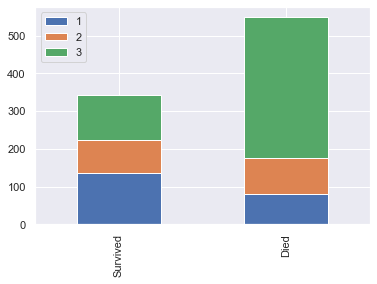

In [15]:
df_class.plot(kind='bar',stacked = True)

In [16]:
Class1_survived = df_class.iloc[0,0]/df_class.iloc[:,0].sum()*100
Class2_survived = df_class.iloc[0,1]/df_class.iloc[:,1].sum()*100
Class3_survived = df_class.iloc[0,2]/df_class.iloc[:,2].sum()*100

In [17]:
print(round(Class1_survived),round(Class2_survived),round(Class3_survived))

63.0 47.0 24.0


In [18]:
from IPython.display import display
display(df_class)

,1,2,3
Survived,136,87,119
Died,80,97,372


## survived /died by sex

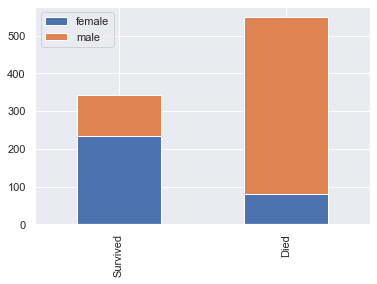

In [19]:
Survived = dataset[dataset['Survived']==1]['Sex'].value_counts()
Died = dataset[dataset['Survived']==0]['Sex'].value_counts()
df_sex = pd.DataFrame([Survived , Died])
df_sex.index = ['Survived','Died']
df_sex.plot(kind='bar',stacked=True)

In [20]:
display(df_sex)

,female,male
Survived,233,109
Died,81,468


In [21]:
female_survived = df_sex.iloc[0,0]/df_sex.iloc[:,0].sum()*100
male_survived = df_sex.iloc[0,1]/df_sex.iloc[:,1].sum()*100

In [22]:
print(round(female_survived),round(male_survived))

74.0 19.0


## Survived / Died by Embarked

In [23]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


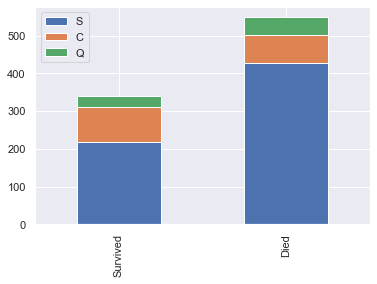

In [24]:
Survived_embark = dataset[dataset['Survived']==1]['Embarked'].value_counts()
Died_embark = dataset[dataset['Survived']==0]['Embarked'].value_counts()
df_embark = pd.DataFrame([Survived_embark,Died_embark])
df_embark.index = ['Survived','Died']
df_embark.plot(kind='bar',stacked = True)

In [25]:
display(df_embark)

,S,C,Q
Survived,217,93,30
Died,427,75,47


In [26]:
Embark_s_survivedf = df_embark.iloc[0,0]/df_embark.iloc[:,0].sum()*100
Embark_c_survivedf = df_embark.iloc[0,1]/df_embark.iloc[:,1].sum()*100
Embark_Q_survivedf = df_embark.iloc[0,2]/df_embark.iloc[:,2].sum()*100

In [27]:
print(round(Embark_s_survivedf),round(Embark_c_survivedf),round(Embark_Q_survivedf))

34.0 55.0 39.0


# Data cleaning,Feature selection and Feature engineering

In [28]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
X = dataset.drop(['PassengerId','SibSp','Parch','Ticket','Fare','Cabin','Survived'],axis=1)
Y = dataset['Survived']

In [30]:
X.head(20)

,Pclass,Name,Sex,Age,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C
2,3,"Heikkinen, Miss. Laina",female,26.0,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S
4,3,"Allen, Mr. William Henry",male,35.0,S
5,3,"Moran, Mr. James",male,NaN,Q
6,1,"McCarthy, Mr. Timothy J",male,54.0,S
7,3,"Palsson, Master. Gosta Leonard",male,2.0,S
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,S
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,C


In [31]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
Embarked    889 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 34.9+ KB


In [33]:
X.describe()

,Pclass,Age
count,891.000000,714.000000
mean,2.308642,29.699118
std,0.836071,14.526497
min,1.000000,0.420000
25%,2.000000,20.125000
50%,3.000000,28.000000
75%,3.000000,38.000000
max,3.000000,80.000000


In [34]:
embark = dataset['Embarked']

## Encoding categorical data

In [35]:
# encode "Sex"
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
X.Sex=labelEncoder_X.fit_transform(X.Sex)


# encode "Embarked"

# number of null values in embarked:
print ('Number of null values in Embarked:', sum(X.Embarked.isnull()))

# fill the two values with one of the options (S, C or Q)
row_index = X.Embarked.isnull()
X.loc[row_index,'Embarked']='S' 

Embarked  = pd.get_dummies(  X.Embarked , prefix='Embarked'  )
X = X.drop(['Embarked'], axis=1)
X= pd.concat([X, Embarked], axis=1)  
# we should drop one of the columns
X = X.drop(['Embarked_S'], axis=1)

X.head()

Number of null values in Embarked: 2


,Pclass,Name,Sex,Age,Embarked_C,Embarked_Q
0,3,"Braund, Mr. Owen Harris",1,22.0,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0,0
4,3,"Allen, Mr. William Henry",1,35.0,0,0


In [36]:
X.head()

,Pclass,Name,Sex,Age,Embarked_C,Embarked_Q
0,3,"Braund, Mr. Owen Harris",1,22.0,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0,0
4,3,"Allen, Mr. William Henry",1,35.0,0,0


In [37]:
print('number of null values in age ', sum(X.Age.isnull()))

number of null values in age  177


In [38]:
got=dataset.Name.str.split(',').str[1]

In [39]:
got

0                                        Mr. Owen Harris
1             Mrs. John Bradley (Florence Briggs Thayer)
2                                            Miss. Laina
3                     Mrs. Jacques Heath (Lily May Peel)
4                                      Mr. William Henry
5                                              Mr. James
6                                          Mr. Timothy J
7                                  Master. Gosta Leonard
8               Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                            Mrs. Nicholas (Adele Achem)
10                                  Miss. Marguerite Rut
11                                       Miss. Elizabeth
12                                     Mr. William Henry
13                                      Mr. Anders Johan
14                           Miss. Hulda Amanda Adolfina
15                               Mrs. (Mary D Kingcome) 
16                                        Master. Eugene
17                             

In [40]:
X.iloc[:,1]=pd.DataFrame(got).Name.str.split('\s+').str[1]

In [41]:
X.iloc[:,1]

0          Mr.
1         Mrs.
2        Miss.
3         Mrs.
4          Mr.
5          Mr.
6          Mr.
7      Master.
8         Mrs.
9         Mrs.
10       Miss.
11       Miss.
12         Mr.
13         Mr.
14       Miss.
15        Mrs.
16     Master.
17         Mr.
18        Mrs.
19        Mrs.
20         Mr.
21         Mr.
22       Miss.
23         Mr.
24       Miss.
25        Mrs.
26         Mr.
27         Mr.
28       Miss.
29         Mr.
        ...   
861        Mr.
862       Mrs.
863      Miss.
864        Mr.
865       Mrs.
866      Miss.
867        Mr.
868        Mr.
869    Master.
870        Mr.
871       Mrs.
872        Mr.
873        Mr.
874       Mrs.
875      Miss.
876        Mr.
877        Mr.
878        Mr.
879       Mrs.
880       Mrs.
881        Mr.
882      Miss.
883        Mr.
884        Mr.
885       Mrs.
886       Rev.
887      Miss.
888      Miss.
889        Mr.
890        Mr.
Name: Name, Length: 891, dtype: object

In [42]:
ages=X.groupby('Name').mean()['Age']
ages

Name
Capt.        70.000000
Col.         58.000000
Don.         40.000000
Dr.          42.000000
Jonkheer.    38.000000
Lady.        48.000000
Major.       48.500000
Master.       4.574167
Miss.        21.773973
Mlle.        24.000000
Mme.         24.000000
Mr.          32.368090
Mrs.         35.898148
Ms.          28.000000
Rev.         43.166667
Sir.         49.000000
the          33.000000
Name: Age, dtype: float64

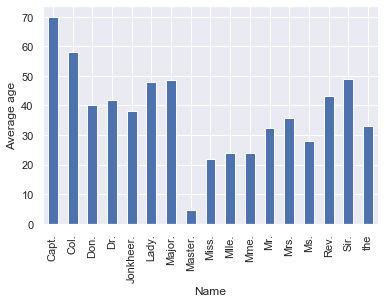

In [43]:
ax=plt.subplot()
ax.set_ylabel('Average age')
ages.plot(kind='bar',ax=ax)

* ax is matplotlib axes object

In [44]:
title_mean_age=[]
title_mean_age.append(list(set(X.Name)))
title_mean_age.append(X.groupby('Name').Age.mean())
title_mean_age

[['the',
  'Dr.',
  'Don.',
  'Lady.',
  'Mme.',
  'Capt.',
  'Mr.',
  'Mlle.',
  'Major.',
  'Ms.',
  'Miss.',
  'Sir.',
  'Mrs.',
  'Col.',
  'Jonkheer.',
  'Rev.',
  'Master.'],
 Name
 Capt.        70.000000
 Col.         58.000000
 Don.         40.000000
 Dr.          42.000000
 Jonkheer.    38.000000
 Lady.        48.000000
 Major.       48.500000
 Master.       4.574167
 Miss.        21.773973
 Mlle.        24.000000
 Mme.         24.000000
 Mr.          32.368090
 Mrs.         35.898148
 Ms.          28.000000
 Rev.         43.166667
 Sir.         49.000000
 the          33.000000
 Name: Age, dtype: float64]

## fill the missing ages

In [45]:
X[X.Age.isnull()]


,Pclass,Name,Sex,Age,Embarked_C,Embarked_Q
5,3,Mr.,1,NaN,0,1
17,2,Mr.,1,NaN,0,0
19,3,Mrs.,0,NaN,1,0
26,3,Mr.,1,NaN,1,0
28,3,Miss.,0,NaN,0,1
29,3,Mr.,1,NaN,0,0
31,1,Mrs.,0,NaN,1,0
32,3,Miss.,0,NaN,0,1
36,3,Mr.,1,NaN,1,0
42,3,Mr.,1,NaN,1,0


In [46]:
n_training = dataset.shape[0]
n_titles = len(title_mean_age[1])
for i in range(0,n_training):
    if np.isnan(X.Age[i]) == True:
        for j in range(0,n_titles):
            if X.Name[i] == title_mean_age[0][j]:
                X.Age[i]= title_mean_age[1][j]

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null int64
Age           891 non-null float64
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
dtypes: float64(1), int64(2), object(1), uint8(2)
memory usage: 29.7+ KB


In [48]:
X=X.drop(['Name'],axis=1)

# Testing classifiers

In [49]:
classifiers_accuracy = {
    
}

## Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(penalty='l2',random_state=0)
classifier_lr.fit(X,Y)
from sklearn.model_selection import cross_val_score
accuracies=[]
for i in range(5,10):
    accuracy = cross_val_score(estimator=classifier_lr,X=X,y=Y,cv=i)
    temp = str(accuracy.mean())+ '+/-' +str(accuracy.std())
    accuracies.append(temp)
print(accuracies)
print(max(accuracies))
accuracies.index(max(accuracies))

['0.7901236866472539+/-0.013520333643196412', '0.7912358667392225+/-0.015658933887008317', '0.7912384277858125+/-0.02330775555507544', '0.7935492716742717+/-0.019374583711929315', '0.7912457912457913+/-0.03499092540543187']
0.7935492716742717+/-0.019374583711929315


3

In [51]:
classifiers_accuracy['Logistic Regression']=accuracies[3]

##  Fitting KNN to the Training set

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
classifier_knn = KNeighborsClassifier(n_neighbors=5)
accuracies=[]
for i in range(5,10):
    accuracy = cross_val_score(estimator=classifier_knn,X=X,y=Y,cv=i)
    temp = str(accuracy.mean())+ '+/-' +str(accuracy.std())
    accuracies.append(temp)
print(accuracies)
print(max(accuracies))
accuracies.index(max(accuracies))

['0.7542244148228218+/-0.03584313185720148', '0.7676854707056049+/-0.04000041659363434', '0.7644084946970914+/-0.035103148834227035', '0.7643385471510472+/-0.04351295845121088', '0.755331088664422+/-0.040059637031593154']
0.7676854707056049+/-0.04000041659363434


1

In [54]:
classifiers_accuracy['KNN']=accuracies[1]

## SVM

In [55]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel='rbf',random_state=0)

In [56]:
accuracies=[]
for i in range(5,10):
    accuracy = cross_val_score(estimator=classifier_svm,X=X,y=Y,cv=i)
    temp = str(accuracy.mean())+ '+/-' +str(accuracy.std())
    accuracies.append(temp)
print(accuracies)
print(max(accuracies))
accuracies.index(max(accuracies))

['0.7732944367783807+/-0.01555586751062602', '0.7766264586734386+/-0.0419641204640607', '0.7755516330547966+/-0.036309971885397384', '0.7766358078858078+/-0.026740148773469335', '0.7833894500561167+/-0.04494945992031602']
0.7833894500561167+/-0.04494945992031602


4

In [57]:
classifiers_accuracy['SVM']=accuracies[4]

## Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB
classifier_nb =GaussianNB()

In [59]:
accuracies=[]
for i in range(5,10):
    accuracy = cross_val_score(estimator=classifier_nb,X=X,y=Y,cv=i)
    temp = str(accuracy.mean())+ '+/-' +str(accuracy.std())
    accuracies.append(temp)
print(accuracies)
print(max(accuracies))
accuracies.index(max(accuracies))

['0.7666221952225468+/-0.03262149257647468', '0.7744195537819699+/-0.020762188150769502', '0.7688553439748603+/-0.01849596523272628', '0.7767268486018486+/-0.025967714358445554', '0.7732884399551067+/-0.034042089535584956']
0.7767268486018486+/-0.025967714358445554


3

In [60]:
classifiers_accuracy['Naive Bayes']=accuracies[3]

## Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=80,n_jobs=-1,min_samples_leaf=2,max_features=0.5,oob_score=True)
classifier_rf.fit(X,Y)
classifier_rf.oob_score_

0.8002244668911336

n_estimators= 40

In [101]:
classifier_rf.oob_score_

0.792368125701459

In [119]:
classifier_rf.oob_score_

0.8047138047138047

n_estimators= 50

In [104]:
classifier_rf.oob_score_

0.7957351290684624

In [120]:
classifier_rf.oob_score_

0.8047138047138047

n_estimators= 60

In [98]:
classifier_rf.oob_score_

0.8002244668911336

In [123]:
classifier_rf.oob_score_

0.7934904601571269

n_estimators= 70

In [107]:
classifier_rf.oob_score_

0.8047138047138047

n_estimators= 80

In [110]:
classifier_rf.oob_score_

0.797979797979798

In [126]:
classifier_rf.oob_score_

0.7946127946127947

In [133]:
classifier_rf.oob_score_

0.8024691358024691

100

In [131]:
classifier_rf.oob_score_

0.7946127946127947

n_estimators= 140

In [113]:
classifier_rf.oob_score_

0.7968574635241302

In [129]:
classifier_rf.oob_score_

0.7901234567901234

In [137]:
accuracies=[]
for i in range(5,10):
    accuracy = cross_val_score(estimator=classifier_rf,X=X,y=Y,cv=i)
    temp = str(accuracy.mean())+ '+/-' +str(accuracy.std())
    accuracies.append(temp)
print(accuracies)
print(max(accuracies))
accuracies.index(max(accuracies))

['0.7991503968207528+/-0.029176632545526528', '0.804741822359272+/-0.041251465104103', '0.8047458074437123+/-0.03949121414904275', '0.8024573680823681+/-0.025705161955636466', '0.8058361391694726+/-0.04062168590539586']
0.8058361391694726+/-0.04062168590539586


4

In [63]:
classifiers_accuracy['RandomForestClassifier']=accuracies[1]

# Analyzing the accuracies of various models

In [64]:
classifiers_accuracy

{'Logistic Regression': '0.7935492716742717+/-0.019374583711929315',
 'KNN': '0.7676854707056049+/-0.04000041659363434',
 'SVM': '0.7833894500561167+/-0.04494945992031602',
 'Naive Bayes': '0.7767268486018486+/-0.025967714358445554',
 'RandomForestClassifier': '0.7901399721869521+/-0.03757765553074824'}

In [65]:
classifier_rf.fit(X,Y)
classifier_knn.fit(X,Y)
classifier_lr.fit(X,Y)
classifier_nb.fit(X,Y)
classifier_svm.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

# Making submission

In [66]:
dataset_t = pd.read_csv('test.csv')

In [67]:
dataset_t.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [68]:
dataset_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [69]:
dataset_t.shape

(418, 11)

In [70]:
Embarked  = pd.get_dummies( dataset_t.Embarked , prefix='Embarked'  )
dataset_t = dataset_t.drop(['Embarked'], axis=1)
dataset_t= pd.concat([dataset_t, Embarked], axis=1)  
# we should drop one of the columns
dataset_t = dataset_t.drop(['Embarked_S'], axis=1)


In [71]:
wanted_test_col = X.columns
wanted_test_col

Index(['Pclass', 'Sex', 'Age', 'Embarked_C', 'Embarked_Q'], dtype='object')

## Filling missing values for ages

In [72]:
# got=dataset_t.Name.str.split(',').str[1]
# got

In [73]:
# dataset_t.iloc[:,1]=pd.DataFrame(got).Name.str.split('\s+').str[1]
# dataset_t['Name']=dataset_t.iloc[:,1]
# dataset_t['Name']

In [74]:
# title_mean_age=[]
# title_mean_age.append(list(set(dataset_t.Name)))
# title_mean_age.append(dataset_t.groupby('Name').Age.mean())
# title_mean_age

In [75]:
# n_training = dataset_t.shape[0]
# n_titles = len(title_mean_age[1])
# for i in range(0,n_training):
#     if np.isnan(dataset_t.Age[i]) == True:
#         for j in range(0,n_titles):
#             if dataset_t.Name[i] == title_mean_age[0][j]:
#                 dataset_t.Age[i]= title_mean_age[1][j]

In [76]:
# dataset_t.info()

In [77]:
# len(dataset_t[dataset_t.Age.isnull()])


In [78]:
# mean_age=dataset_t.Age.mean()

In [79]:
# for i in range(0,n_training):
#     if np.isnan(dataset_t.Age[i]) == True:
#           dataset_t.Age[i]= mean_age

In [80]:
# dataset_t.info()

## Making prediction

In [81]:
prediction_rf = classifier_rf.predict(dataset_t[wanted_test_col].apply(LabelEncoder().fit_transform))
prediction_lr = classifier_lr.predict(dataset_t[wanted_test_col].apply(LabelEncoder().fit_transform))
prediction_svm = classifier_svm.predict(dataset_t[wanted_test_col].apply(LabelEncoder().fit_transform))
prediction_nb = classifier_nb.predict(dataset_t[wanted_test_col].apply(LabelEncoder().fit_transform))
prediction_knn = classifier_knn.predict(dataset_t[wanted_test_col].apply(LabelEncoder().fit_transform))

In [138]:
prediction_rf = classifier_rf.predict(dataset_t[wanted_test_col].apply(LabelEncoder().fit_transform))

In [82]:
print(prediction_rf[:20],
prediction_lr[:20],
prediction_svm[:20],
prediction_nb[:20],
prediction_knn[:20],end='\n')

[0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1] [0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1] [0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0] [0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1] [0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1]


In [139]:
submission_rf = pd.DataFrame()
submission_rf['PassengerId']=dataset_t['PassengerId']
submission_rf['Survived']=prediction_rf
submission_rf.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [83]:
submission_rf = pd.DataFrame()
submission_rf['PassengerId']=dataset_t['PassengerId']
submission_rf['Survived']=prediction_rf
submission_rf.head()

submission_lr = pd.DataFrame()
submission_lr['PassengerId']=dataset_t['PassengerId']
submission_lr['Survived']=prediction_lr
submission_lr.head()

submission_svm = pd.DataFrame()
submission_svm['PassengerId']=dataset_t['PassengerId']
submission_svm['Survived']=prediction_svm
submission_svm.head()

submission_knn= pd.DataFrame()
submission_knn['PassengerId']=dataset_t['PassengerId']
submission_knn['Survived']=prediction_knn
submission_knn.head()

submission_nb = pd.DataFrame()
submission_nb['PassengerId']=dataset_t['PassengerId']
submission_nb['Survived']=prediction_nb
submission_nb.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [140]:
submission_rf.to_csv('submission_rf.csv',index=False)

In [84]:
submission_lr.to_csv('submission_lr.csv',index=False)
submission_rf.to_csv('submission_rf.csv',index=False)
submission_svm.to_csv('submission_svm.csv',index=False)
submission_knn.to_csv('submission_knn.csv',index=False)
submission_nb.to_csv('submission_nb.csv',index=False)

In [85]:
submission_check = pd.read_csv('submission_rf.csv')

In [86]:
submission_check.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [87]:
add_datepart(df_raw, 'saledate')
train_cats(df_raw)a
df_raw.UsageBand.cat.categories
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)
df_raw.UsageBand = df_raw.UsageBand.cat.codes
df, y, nas = proc_df(df_raw, 'SalePrice')

SyntaxError: invalid syntax (<ipython-input-87-c7d3fd698aa9>, line 2)

In [141]:
!ls

gender_submission.csv  submission_rf2.csv      train.csv
submission.csv	       submission_rf.csv       Untitled1.ipynb
submission_knn.csv     submission_svm.csv      Untitled.ipynb
submission_lr.csv      test.csv
submission_nb.csv      titanic_survival.ipynb
